In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from prophet import Prophet
import tensorflow as tf
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
def arima_model(train_data, test_data):
    model = ARIMA(train_data, order=(2, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test_data))
    return forecast
def calculate_accuracy(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, mape, rmse

def plotArima(arima_forecast , df_test , df_train):
    # Calculate residuals
    residuals = df_test['cycle'] - arima_forecast

    # Plotting
    plt.figure(figsize=(16, 14))

    # Plot actual vs. forecast with enhanced style
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index, df_test['cycle'], label='Actual', color='#007acc', linewidth=2)
    plt.plot(df_test.index, arima_forecast, label='ARIMA Forecast', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, arima_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.title('ARIMA - Actual vs Forecast', fontsize=14)
    plt.legend()

    # Plot train, test, and forecasted data with modern aesthetics
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train['cycle'], label='Train Data', color='#009688', linewidth=2)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', color='#007acc', linewidth=2)
    plt.plot(df_test.index, arima_forecast, label='Forecasted Data', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, arima_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.title('ARIMA Forecasting', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.legend()

    # Plot PACF of residuals
    plt.subplot(3, 3, 3)
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    # Bell-shaped histogram (Density plot) of residuals
    plt.subplot(3, 3, 4)
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Heatmap of Autocorrelation
    lag_corr = pd.concat([residuals.shift(i) for i in range(11)], axis=1)
    lag_corr.columns = ['t'] + [f't-{i}' for i in range(1, 11)]
    plt.subplot(3, 3, 5)
    sns.heatmap(lag_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Heatmap of Autocorrelation', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('Lag', fontsize=12)

    # Scatter plot of actual vs. forecasted values
    plt.subplot(3, 3, 6)
    plt.scatter(df_test['cycle'], arima_forecast, color='#e63b2e', alpha=0.8)
    plt.plot(df_test['cycle'], df_test['cycle'], color='#007acc', linestyle='--', linewidth=2)
    plt.title('Actual vs Forecasted Values', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Forecasted Values', fontsize=12)

    # Customize layout and appearance
    plt.tight_layout()
    plt.style.use('seaborn-dark')  # Apply a modern seaborn style
    plt.grid(False)  # Disable gridlines
    plt.xticks(fontsize=10)  # Adjust tick label font size
    plt.yticks(fontsize=10)
    plt.show()

def sarima_model(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test_data))
    return forecast

def plotSarima(sarima_forecast , df_test , df_train):
    residuals = df_test['cycle'] - sarima_forecast
    plt.figure(figsize=(16, 14))

    # Plot actual vs. forecast with enhanced style
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index, df_test['cycle'], label='Actual', color='#007acc', linewidth=2)
    plt.plot(df_test.index, sarima_forecast, label='SARIMA Forecast', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, sarima_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.title('SARIMA - Actual vs Forecast', fontsize=14)
    plt.legend()

    # Plot train, test, and forecasted data with modern aesthetics
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train['cycle'], label='Train Data', color='#009688', linewidth=2)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', color='#007acc', linewidth=2)
    plt.plot(df_test.index, sarima_forecast, label='Forecasted Data', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, sarima_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.title('SARIMA Forecasting', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.legend()

    # Plot PACF of residuals
    plt.subplot(3, 3, 3)
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    # Bell-shaped histogram (Density plot) of residuals
    plt.subplot(3, 3, 4)
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Heatmap of Autocorrelation
    lag_corr = pd.concat([residuals.shift(i) for i in range(11)], axis=1)
    lag_corr.columns = ['t'] + [f't-{i}' for i in range(1, 11)]
    plt.subplot(3, 3, 5)
    sns.heatmap(lag_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Heatmap of Autocorrelation', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('Lag', fontsize=12)

    # Scatter plot of actual vs. forecasted values
    plt.subplot(3, 3, 6)
    plt.scatter(df_test['cycle'], sarima_forecast, color='#e63b2e', alpha=0.8)
    plt.plot(df_test['cycle'], df_test['cycle'], color='#007acc', linestyle='--', linewidth=2)
    plt.title('Actual vs Forecasted Values', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Forecasted Values', fontsize=12)

    # Customize layout and appearance
    plt.tight_layout()
    plt.style.use('seaborn-dark')  # Apply a modern seaborn style
    plt.grid(False)  # Disable gridlines
    plt.xticks(fontsize=10)  # Adjust tick label font size
    plt.yticks(fontsize=10)
    plt.show()


def ets_model(train_data, test_data):
    model = ExponentialSmoothing(train_data)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test_data))
    return forecast

def plotETS(ets_forecast , df_test , df_train):
    residuals = df_test['cycle'] - ets_forecast
    plt.figure(figsize=(16, 14))

    # Plot actual vs. forecast with enhanced style
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index, df_test['cycle'], label='Actual', color='#007acc', linewidth=2)
    plt.plot(df_test.index, ets_forecast, label='ETS Forecast', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, ets_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.title('ETS - Actual vs Forecast', fontsize=14)
    plt.legend()

    # Plot train, test, and forecasted data with modern aesthetics
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train['cycle'], label='Train Data', color='#009688', linewidth=2)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', color='#007acc', linewidth=2)
    plt.plot(df_test.index, ets_forecast, label='Forecasted Data', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, ets_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.title('ETS Forecasting', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.legend()

    # Plot PACF of residuals
    plt.subplot(3, 3, 3)
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    # Bell-shaped histogram (Density plot) of residuals
    plt.subplot(3, 3, 4)
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Heatmap of Autocorrelation
    lag_corr = pd.concat([residuals.shift(i) for i in range(11)], axis=1)
    lag_corr.columns = ['t'] + [f't-{i}' for i in range(1, 11)]
    plt.subplot(3, 3, 5)
    sns.heatmap(lag_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Heatmap of Autocorrelation', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('Lag', fontsize=12)

    # Scatter plot of actual vs. forecasted values
    plt.subplot(3, 3, 6)
    plt.scatter(df_test['cycle'], ets_forecast, color='#e63b2e', alpha=0.8)
    plt.plot(df_test['cycle'], df_test['cycle'], color='#007acc', linestyle='--', linewidth=2)
    plt.title('Actual vs Forecasted Values', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Forecasted Values', fontsize=12)

    # Customize layout and appearance
    plt.tight_layout()
    plt.style.use('seaborn-dark')  # Apply a modern seaborn style
    plt.grid(False)  # Disable gridlines
    plt.xticks(fontsize=10)  # Adjust tick label font size
    plt.yticks(fontsize=10)
    plt.show()

def prophet_model(train_data, test_data):
    model = Prophet()
    df = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
    model.fit(df)
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(test_data))

def plotProphet(prophet_forecast , df_test , df_train):
    residuals = df_test['cycle'] - prophet_forecast
    plt.figure(figsize=(9, 9))

    # Plot actual vs. forecast with enhanced style
    plt.subplot(2, 2, 1)
    plt.plot(df_test.index, df_test['cycle'], label='Actual', color='#007acc', linewidth=2)
    plt.plot(df_test.index, prophet_forecast, label='ETS Forecast', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, prophet_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.title('PROPHET - Actual vs Forecast', fontsize=14)
    plt.legend()

    # Plot train, test, and forecasted data with modern aesthetics
    plt.subplot(2, 2, 2)
    plt.plot(df_train.index, df_train['cycle'], label='Train Data', color='#009688', linewidth=2)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', color='#007acc', linewidth=2)
    plt.plot(df_test.index, prophet_forecast, label='Forecasted Data', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, prophet_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.title('PROPHRT Forecasting', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.legend()

    # Plot PACF of residuals
    plt.subplot(2, 2, 3)
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)
    plt.legend()


    # Scatter plot of actual vs. forecasted values
    plt.subplot(2, 2, 4)
    plt.scatter(df_test['cycle'], prophet_forecast, color='#e63b2e', alpha=0.8)
    plt.plot(df_test['cycle'], df_test['cycle'], color='#007acc', linestyle='--', linewidth=2)
    plt.title('Actual vs Forecasted Values', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Forecasted Values', fontsize=12)
    plt.legend()

    # Customize layout and appearance
    plt.tight_layout()
    plt.style.use('seaborn-dark')  # Apply a modern seaborn style
    plt.grid(False)  # Disable gridlines
    plt.xticks(fontsize=10)  # Adjust tick label font size
    plt.yticks(fontsize=10)
    plt.show()


def ann_model(X_train_scaled, y_train, X_test_scaled, y_test ):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)
    predictions = model.predict(X_test_scaled)
    return predictions


def plotAnn(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test , ann_predictions):
    ann_predictions_series = pd.Series(ann_predictions.reshape(-1), index=df_test.index[:len(ann_predictions)])
    plt.figure(figsize=(24, 24))
    # Plot 1
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index[:len(y_test)], y_test, label='Actual')
    plt.plot(df_test.index[:len(ann_predictions)], ann_predictions, label='ANN Prediction')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('ANN - Actual vs Prediction')
    plt.legend()

    # Plot 2
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train, label='Train Data')
    plt.plot(df_test.index, df_test, label='Test Data')
    plt.plot(ann_predictions_series.index, ann_predictions_series, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('ANN - Train, Test, and Forecasted Data')
    plt.legend()

    # Plot 3
    plt.subplot(3, 3, 3)
    residuals = y_test - ann_predictions.reshape(-1)
    plt.plot(df_test.index[:len(residuals)], residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.title('Residuals Plot')
    plt.legend()

    # Plot 4
    plt.subplot(3, 3, 4)
    mean_prediction = np.mean(ann_predictions)
    std_deviation = np.std(ann_predictions)
    upper_bound = mean_prediction + 1.96 * std_deviation
    lower_bound = mean_prediction - 1.96 * std_deviation
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', linestyle="--")
    plt.plot(df_test.index, mean_prediction * np.ones_like(df_test['cycle']), label='Mean Prediction', linestyle='-.')
    plt.fill_between(df_test.index, lower_bound * np.ones_like(df_test['cycle']), upper_bound * np.ones_like(df_test['cycle']), alpha=0.3, color='orange', label='95% Prediction Interval')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('ANN - Mean Prediction and 95% Prediction Interval')
    plt.legend()

    # Plot 5
    plt.subplot(3, 3, 5)
    estimated_risk = mean_squared_error(y_test, ann_predictions)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', marker='o', linestyle='-')
    plt.plot(df_test.index, estimated_risk * np.ones_like(df_test['cycle']), label='Estimated Risk Prediction', marker='*', linestyle='-.')
    plt.xlabel('Date')
    plt.ylabel('Estimated Risk')
    plt.title('ANN - Estimated Risk Prediction')
    plt.legend()

    # Plot 6
    plt.subplot(3, 3, 6)
    num_curves = 5  # Number of curves to sample
    sampled_curves = []
    for _ in range(num_curves):
        ann_predictions = ann_model(X_train_scaled, y_train, X_test_scaled, y_test)
        sampled_curves.append(ann_predictions)
    plt.plot(X_test.index, y_test, label='Test Data', color='black', linewidth=2, alpha=0.5)
    for i, curve in enumerate(sampled_curves):
        plt.plot(X_test.index, curve, label=f'Curve {i+1}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('ANN - Sampled Curves')
    plt.legend()


    plt.subplot(3, 3, 7)
    # Assuming 'residuals' is already calculated
    residuals = y_test - ann_predictions.reshape(-1)
    # Plot PACF of residuals
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    plt.subplot(3, 3, 8)
    # Bell-shaped histogram (Density plot) of residuals
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.tight_layout()
    plt.show()

def svr_model(X_train_scaled, y_train, X_test_scaled):
    model = SVR(kernel='rbf')
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    return predictions

def plotSvr(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test ,svr_predictions):
    svr_predictions_series = pd.Series(svr_predictions.reshape(-1), index=df_test.index[:len(svr_predictions)])
    plt.figure(figsize=(24, 24))
    # Plot 1
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index[:len(y_test)], y_test, label='Actual')
    plt.plot(df_test.index[:len(svr_predictions)], svr_predictions, label='svr Prediction')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('LSTM - Actual vs Prediction')
    plt.legend()

    # Plot 2
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train, label='Train Data')
    plt.plot(df_test.index, df_test, label='Test Data')
    plt.plot(svr_predictions_series.index, svr_predictions_series, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('SVR - Train, Test, and Forecasted Data')
    plt.legend()

    # Plot 4
    plt.subplot(3, 3, 3)
    mean_prediction = np.mean(svr_predictions)
    std_deviation = np.std(svr_predictions)
    upper_bound = mean_prediction + 1.96 * std_deviation
    lower_bound = mean_prediction - 1.96 * std_deviation
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', linestyle="--")
    plt.plot(df_test.index, mean_prediction * np.ones_like(df_test['cycle']), label='Mean Prediction', linestyle='-.')
    plt.fill_between(df_test.index, lower_bound * np.ones_like(df_test['cycle']), upper_bound * np.ones_like(df_test['cycle']), alpha=0.3, color='orange', label='95% Prediction Interval')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('LSTM - Mean Prediction and 95% Prediction Interval')
    plt.legend()


    plt.subplot(3, 3, 4)
    # Assuming 'residuals' is already calculated
    residuals = y_test - svr_predictions.reshape(-1)
    # Plot PACF of residuals
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    plt.subplot(3, 3, 5)
    # Bell-shaped histogram (Density plot) of residuals
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.tight_layout()
    plt.show()

def lstm_model(X_train_scaled, y_train, X_test_scaled):
    # Reshape input data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    # Define LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=0)
    lstm_predictions = model.predict(X_test_lstm)
    return lstm_predictions.flatten()  # Ensure predictions are flattened
def lstm_model2(X_train_scaled, y_train, X_test_scaled):
    # Reshape input data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_lstm = X_test_scaled  # No need to reshape X_test_scaled again
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=0)
    lstm_predictions = model.predict(X_test_lstm)
    return lstm_predictions.flatten()  # Return flattened predictions

def plotLstm(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test ,lstm_predictions):
    lstm_predictions_series = pd.Series(lstm_predictions.reshape(-1), index=df_test.index[:len(lstm_predictions)])
    plt.figure(figsize=(24, 24))
    # Plot 1
    plt.subplot(3, 3, 1)
    plt.plot(df_test.index[:len(y_test)], y_test, label='Actual')
    plt.plot(df_test.index[:len(lstm_predictions)], lstm_predictions, label='LSTM Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('LSTM - Actual vs Prediction')
    plt.legend()

    # Plot 2
    plt.subplot(3, 3, 2)
    plt.plot(df_train.index, df_train, label='Train Data')
    plt.plot(df_test.index, df_test, label='Test Data')
    plt.plot(lstm_predictions_series.index, lstm_predictions_series, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('LSTM - Train, Test, and Forecasted Data')
    plt.legend()

    # Plot 3
    plt.subplot(3, 3, 3)
    residuals = y_test - lstm_predictions.reshape(-1)
    plt.plot(df_test.index[:len(residuals)], residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.title('Residuals Plot')
    plt.legend()

    # Plot 4
    plt.subplot(3, 3, 4)
    mean_prediction = np.mean(lstm_predictions)
    std_deviation = np.std(lstm_predictions)
    upper_bound = mean_prediction + 1.96 * std_deviation
    lower_bound = mean_prediction - 1.96 * std_deviation
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', linestyle="--")
    plt.plot(df_test.index, mean_prediction * np.ones_like(df_test['cycle']), label='Mean Prediction', linestyle='-.')
    plt.fill_between(df_test.index, lower_bound * np.ones_like(df_test['cycle']), upper_bound * np.ones_like(df_test['cycle']), alpha=0.3, color='orange', label='95% Prediction Interval')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('LSTM - Mean Prediction and 95% Prediction Interval')
    plt.legend()


    plt.subplot(3, 3, 5)
    # Assuming 'residuals' is already calculated
    residuals = y_test - lstm_predictions.reshape(-1)
    # Plot PACF of residuals
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)

    plt.subplot(3, 3, 6)
    # Bell-shaped histogram (Density plot) of residuals
    sns.histplot(residuals, kde=True, color='#009688')
    plt.title('Histogram of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.tight_layout()
    plt.show()




def hybrid_model(train_data, test_data):
    # Fit ARIMA model
    arima_model = ARIMA(train_data, order=(2, 1, 0)) 
    arima_model_fit = arima_model.fit()
    
    # Forecast using ARIMA model
    arima_forecast = arima_model_fit.forecast(len(test_data))
    
    # Calculate residuals
    arima_residuals = test_data - arima_forecast
    
    # Prepare lagged features and differenced targets for ANN
    X_train_ann = train_data.shift(1).dropna().values.reshape(-1, 1)
    y_train_ann = train_data.diff().shift(-1).dropna().values.reshape(-1, 1)
    X_test_ann = test_data.shift(1).dropna().values.reshape(-1, 1)
    
    # Scale the data using StandardScaler
    scaler_ann = StandardScaler()
    X_train_ann_scaled = scaler_ann.fit_transform(X_train_ann)
    y_train_ann_scaled = scaler_ann.transform(y_train_ann)
    X_test_ann_scaled = scaler_ann.transform(X_test_ann)
    
    ann_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_ann_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
    ann_model.fit(X_train_ann_scaled, y_train_ann_scaled, epochs=300, batch_size=128, verbose=0)
    
    ann_residuals_scaled = ann_model.predict(X_test_ann_scaled)
    ann_residuals = scaler_ann.inverse_transform(ann_residuals_scaled).flatten()
    
    if len(ann_residuals) < len(test_data):
        ann_residuals = np.append(ann_residuals, [ann_residuals[-1]])  # Append last value to match length
    
    # Calculate hybrid forecast by combining ARIMA forecast and ANN residuals
    hybrid_forecast = arima_forecast + ann_residuals
    
    return hybrid_forecast

def plotHybrid(df_test , hybrid_forecast , df_train):
    # Plot Hybrid Model predictions
    residuals = df_test['cycle'] - hybrid_forecast
    plt.figure(figsize=(9, 9))

    # Plot actual vs. forecast with enhanced style
    plt.subplot(2, 2, 1)
    plt.plot(df_test.index, df_test['cycle'], label='Actual', color='#007acc', linewidth=2)
    plt.plot(df_test.index, hybrid_forecast, label='HYBRID Forecast', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, hybrid_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.title('HYBRID - Actual vs Forecast', fontsize=14)
    plt.legend()

    # Plot train, test, and forecasted data with modern aesthetics
    plt.subplot(2, 2, 2)
    plt.plot(df_train.index, df_train['cycle'], label='Train Data', color='#009688', linewidth=2)
    plt.plot(df_test.index, df_test['cycle'], label='Test Data', color='#007acc', linewidth=2)
    plt.plot(df_test.index, hybrid_forecast, label='Forecasted Data', color='#e63b2e', linestyle='--', linewidth=2)
    plt.fill_between(df_test.index, hybrid_forecast, df_test['cycle'], color='#e63b2e', alpha=0.1)
    plt.title('HYBRID Forecasting', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cycle Value', fontsize=12)
    plt.legend()

    # Plot PACF of residuals
    plt.subplot(2, 2, 3)
    plot_pacf(residuals, lags=30, ax=plt.gca(), color='purple')
    plt.title('Partial Autocorrelation of Residuals', fontsize=14)
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('PACF', fontsize=12)
    plt.legend()


    # Scatter plot of actual vs. forecasted values
    plt.subplot(2, 2, 4)
    plt.scatter(df_test['cycle'], hybrid_forecast, color='#e63b2e', alpha=0.8)
    plt.plot(df_test['cycle'], df_test['cycle'], color='#007acc', linestyle='--', linewidth=2)
    plt.title('Actual vs Forecasted Values', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Forecasted Values', fontsize=12)
    plt.legend()

    # Customize layout and appearance
    plt.tight_layout()
    plt.style.use('seaborn-dark')  # Apply a modern seaborn style
    plt.grid(False)  # Disable gridlines
    plt.xticks(fontsize=10)  # Adjust tick label font size
    plt.yticks(fontsize=10)
    plt.show()


    




ARIMA Accuracy:
MAE: 0.03413716581672097, MAPE: 5380885584204.79, RMSE: 0.04560158101620995


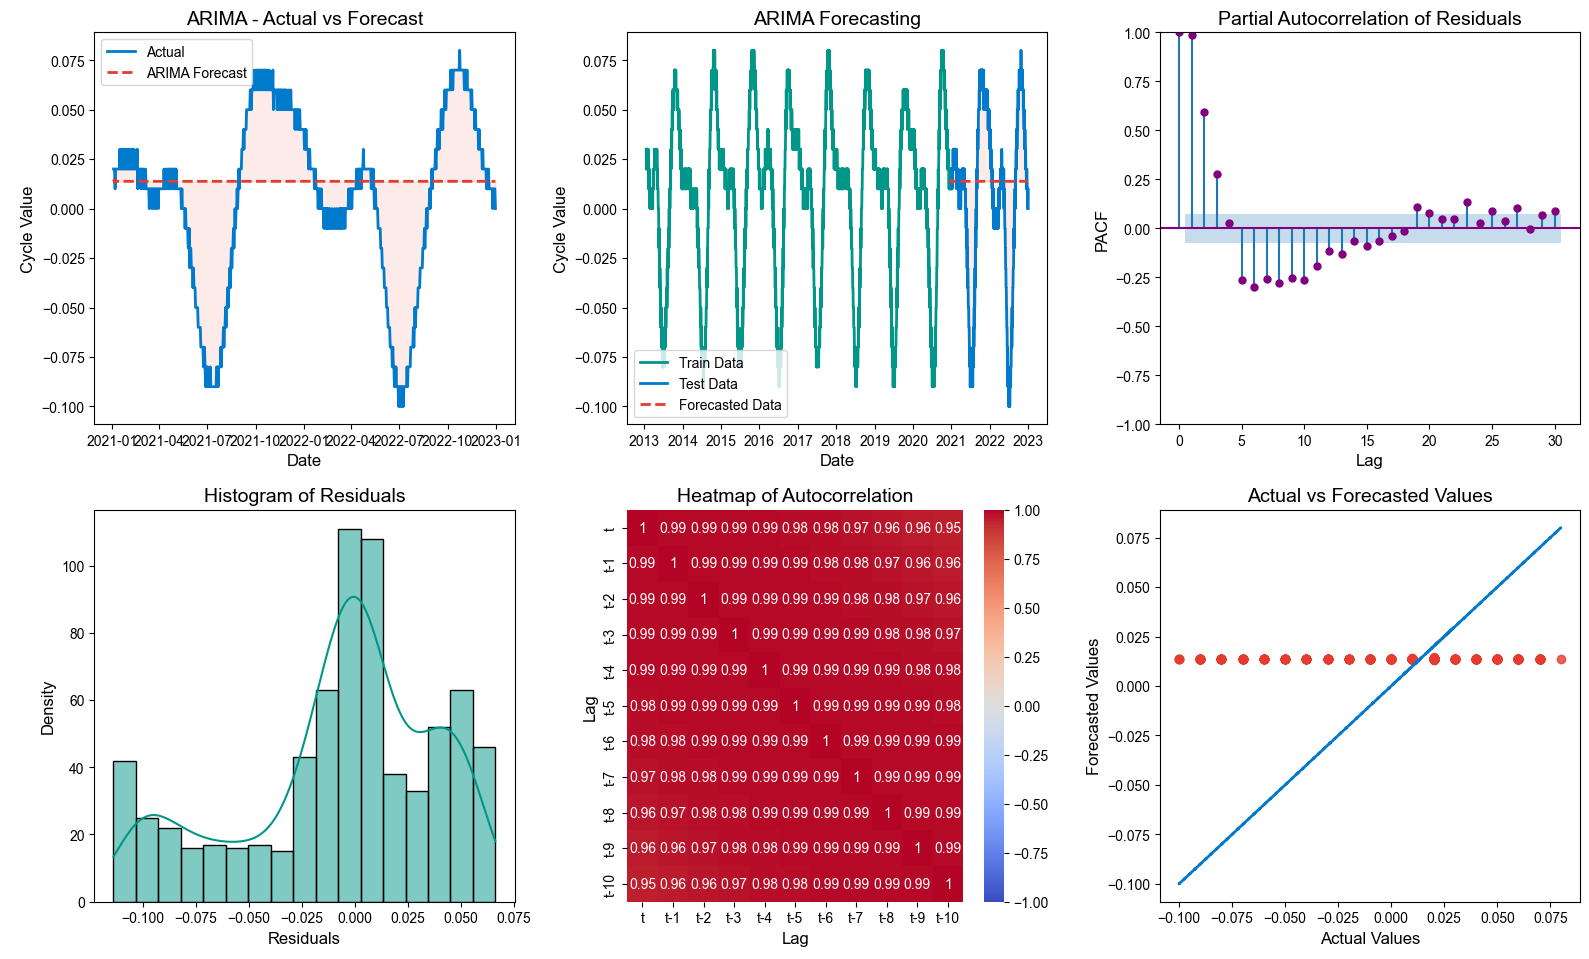

SARIMA Accuracy:
MAE: 0.04347910043276792, MAPE: 6960544616676.211, RMSE: 0.05334104378862111


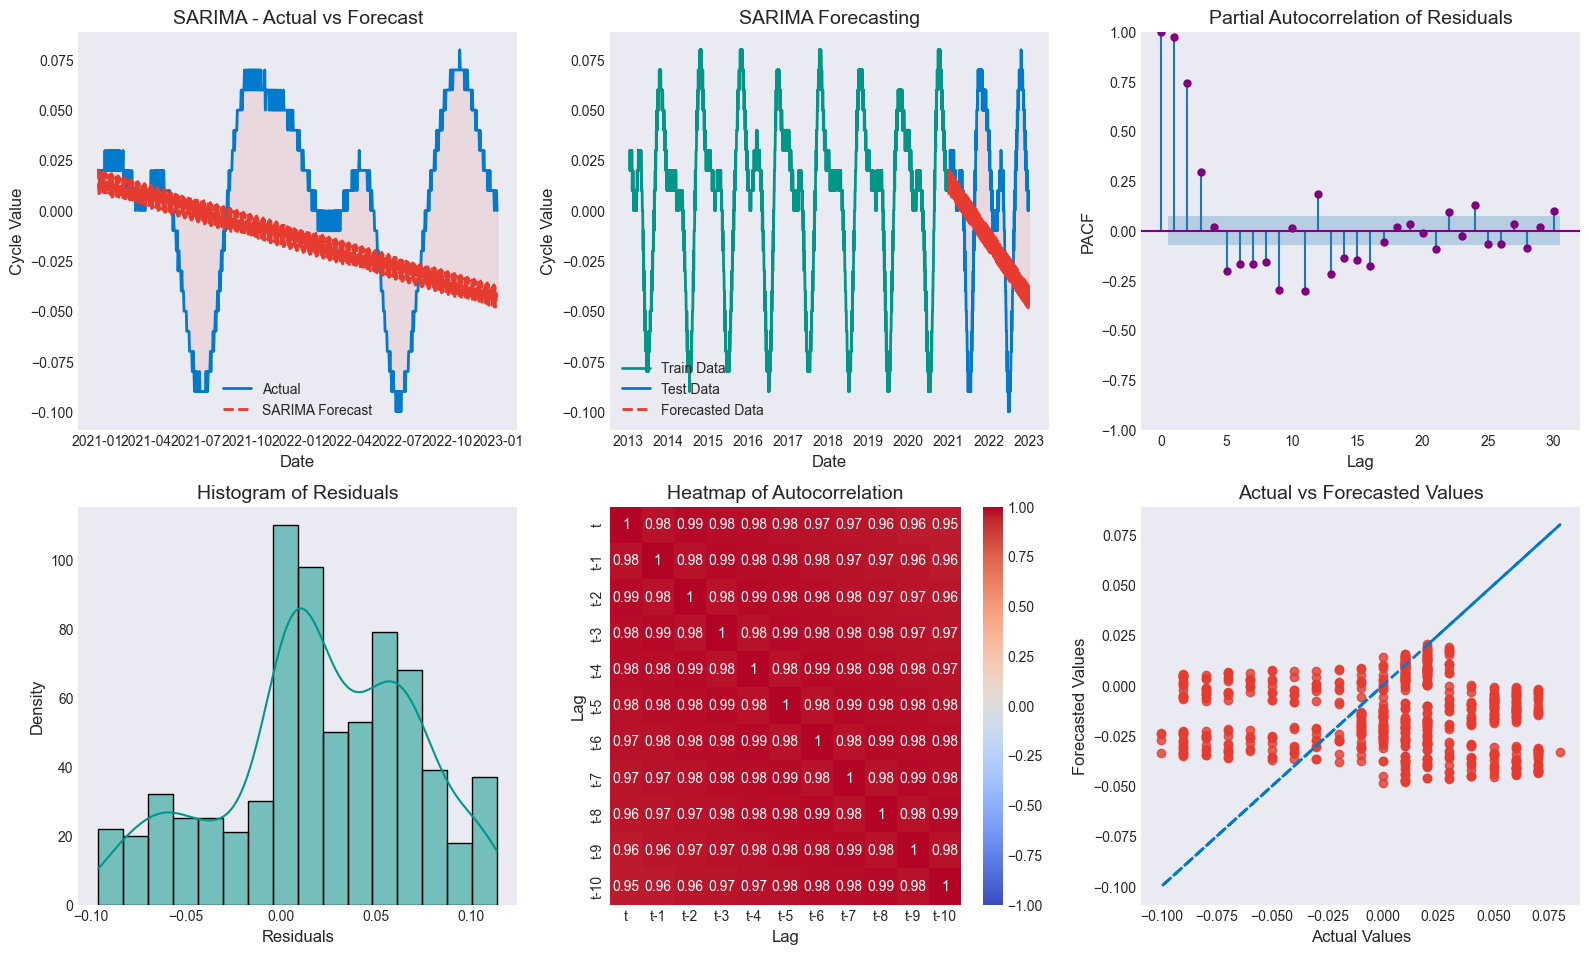

ETS Accuracy:
MAE: 0.03413388123432983, MAPE: 5358596123128.038, RMSE: 0.045591794488982984


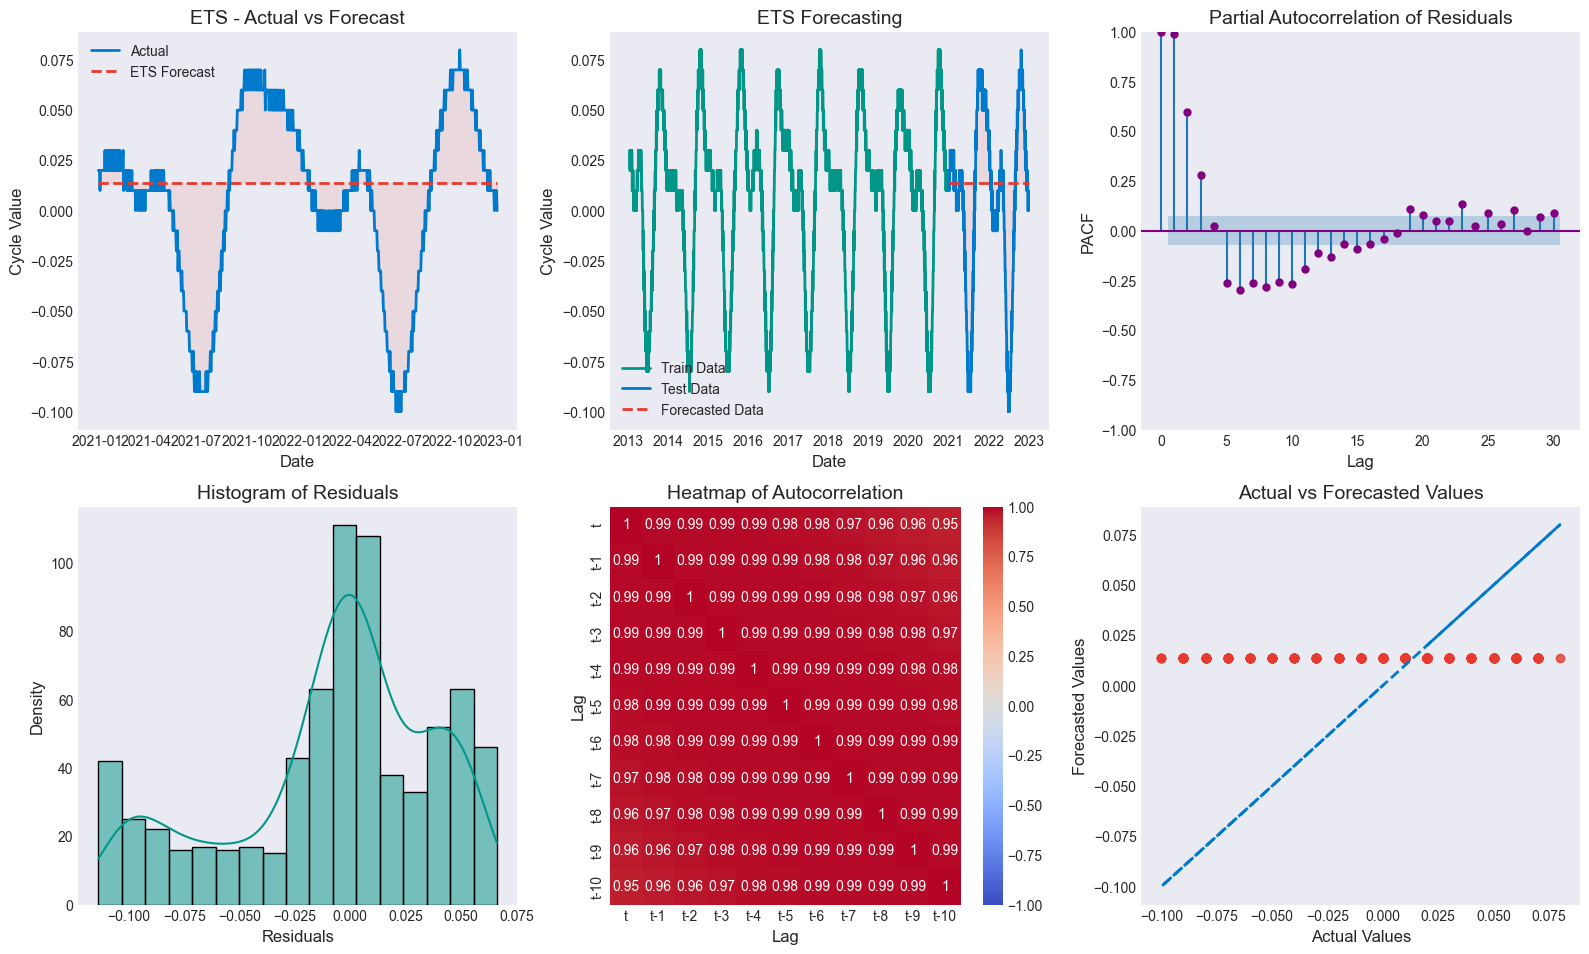

15:20:57 - cmdstanpy - INFO - Chain [1] start processing
15:20:57 - cmdstanpy - INFO - Chain [1] done processing
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Prophet Accuracy:
MAE: 0.008212278225046263, MAPE: 4050167907030.2876, RMSE: 0.009948504684815463


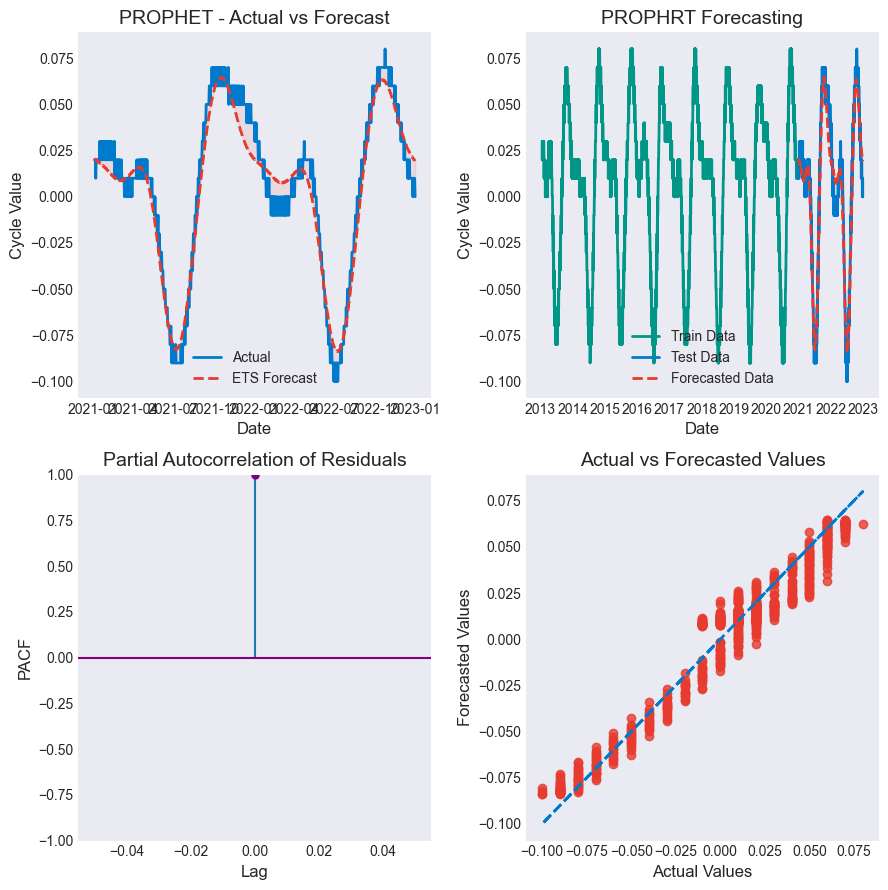

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
ANN Accuracy:
MAE: 0.0002902751900381256, MSE: 1.869818201428233e-07, RMSE: 0.000432413945361182
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


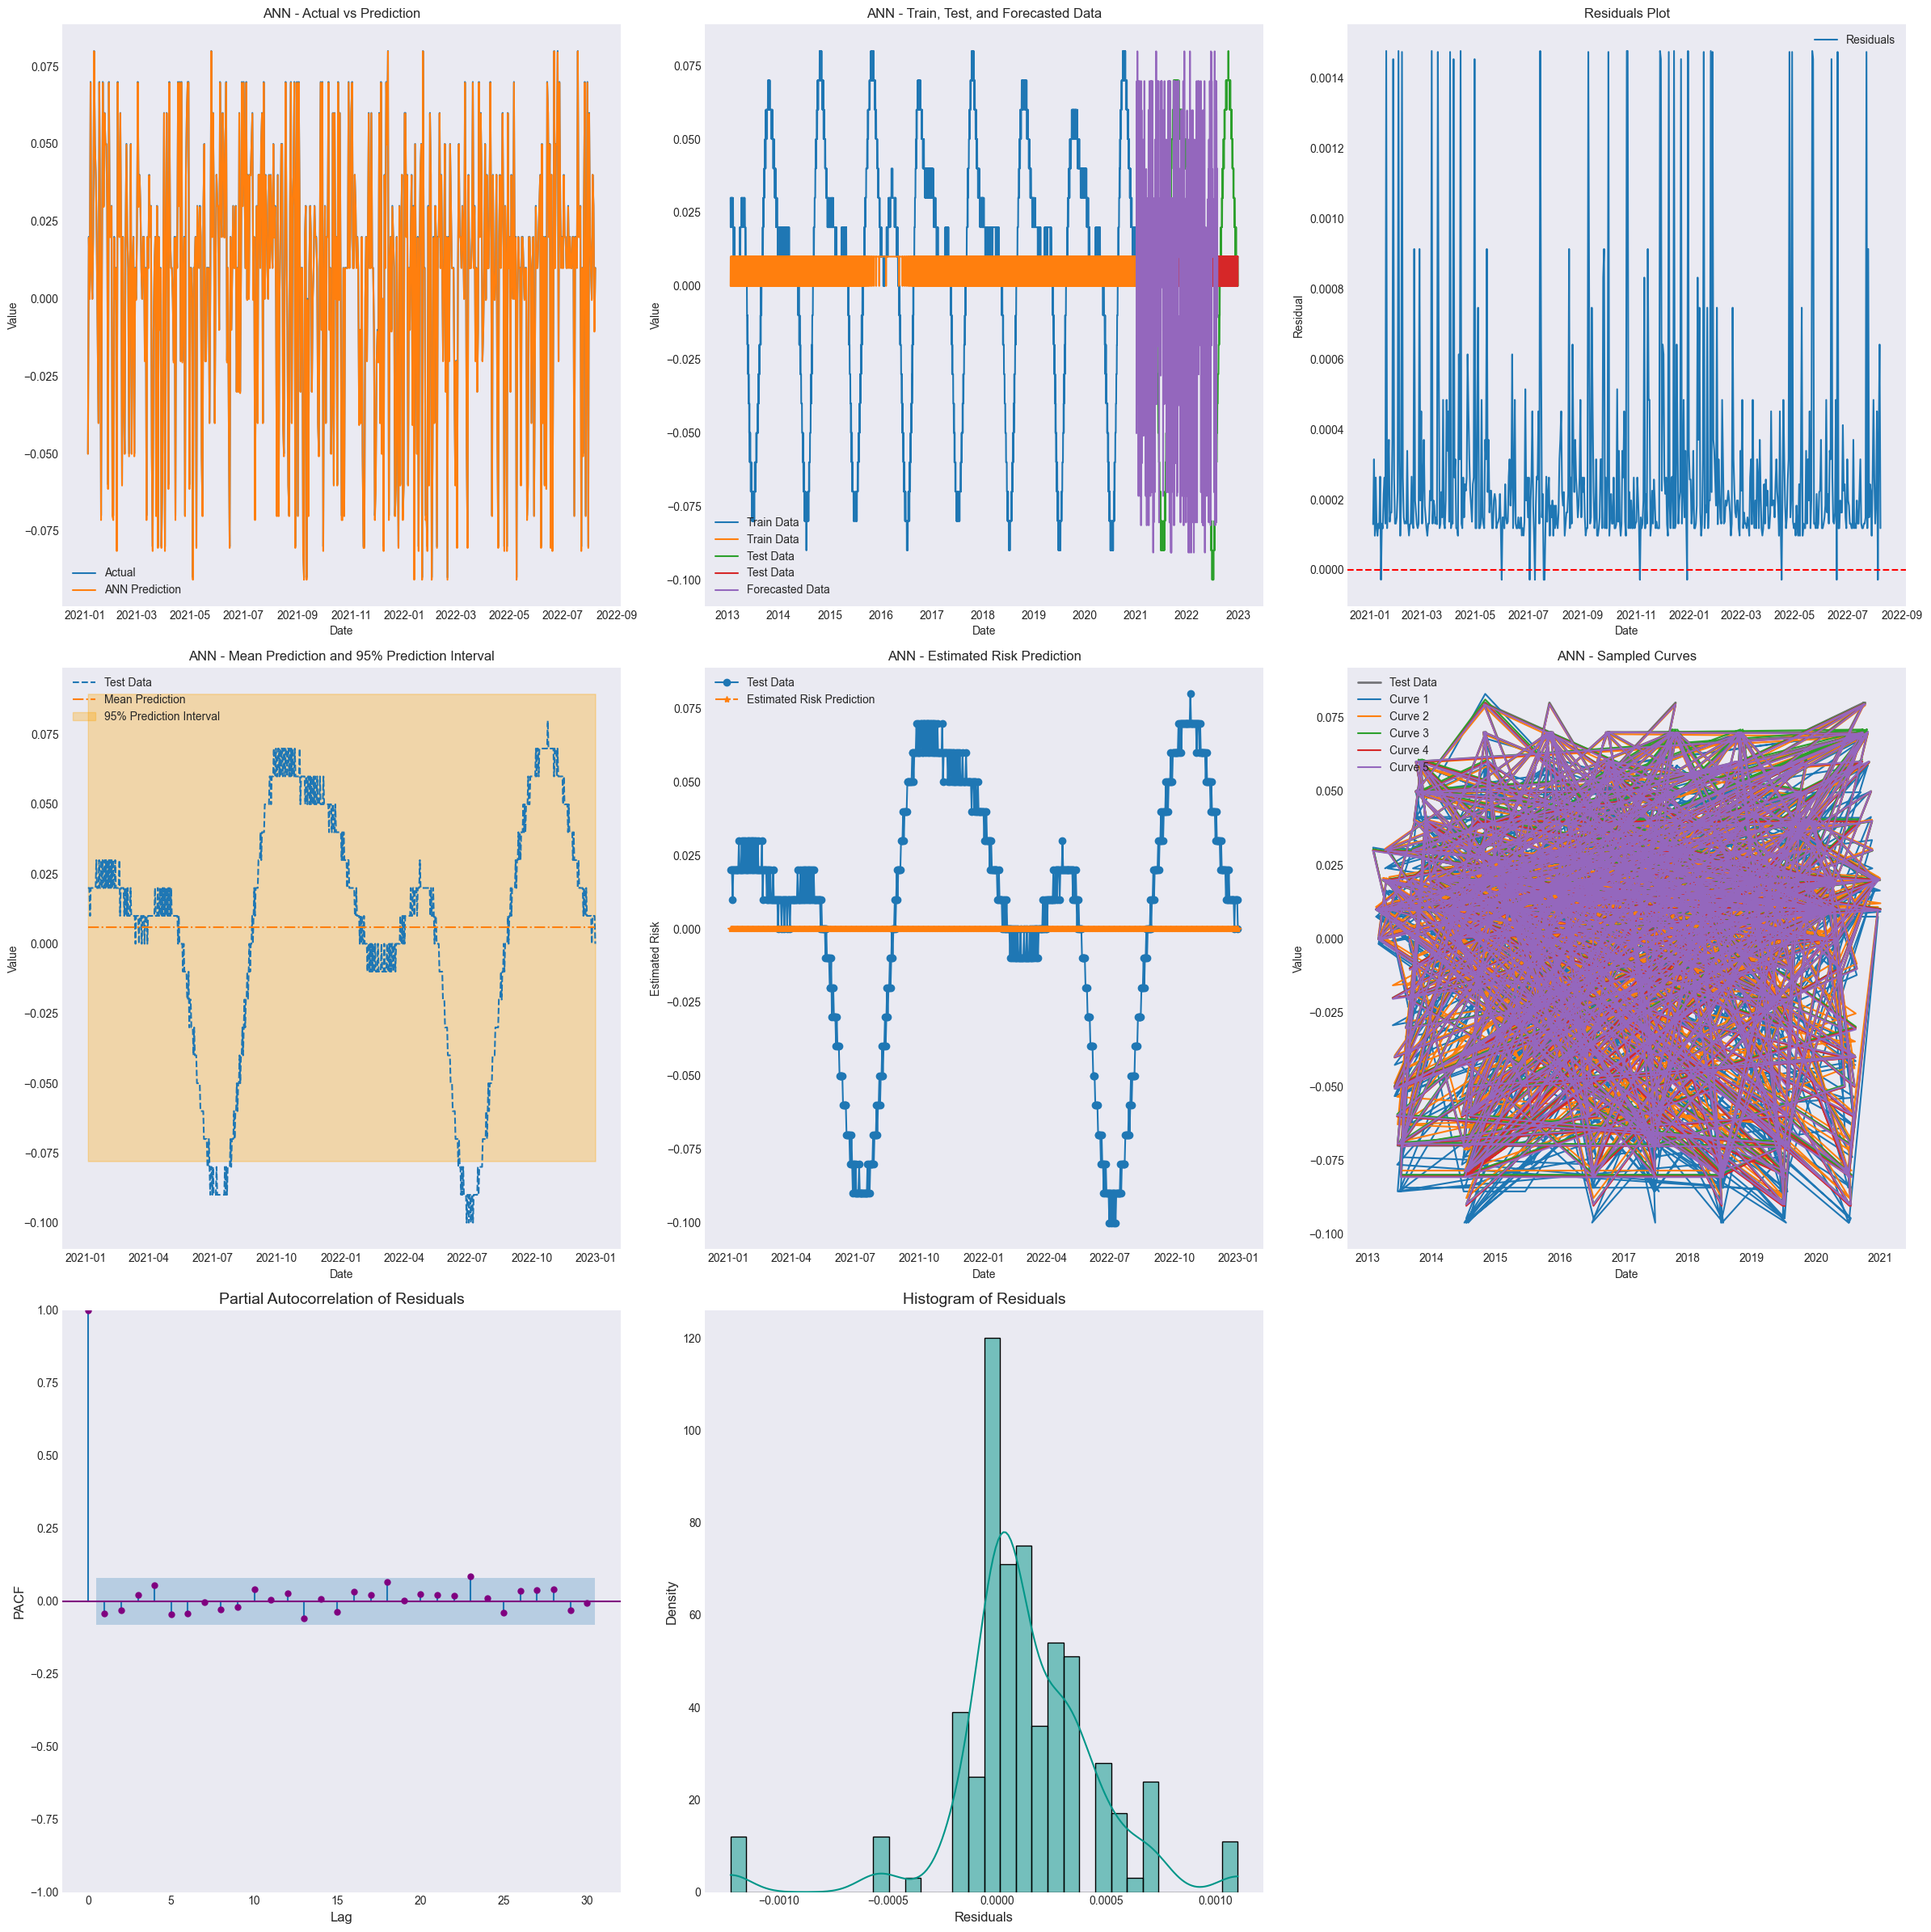

SVR Accuracy:
MAE: 0.03718588640275117, MSE: 0.0019348106712562985, RMSE: 0.04398648282434387


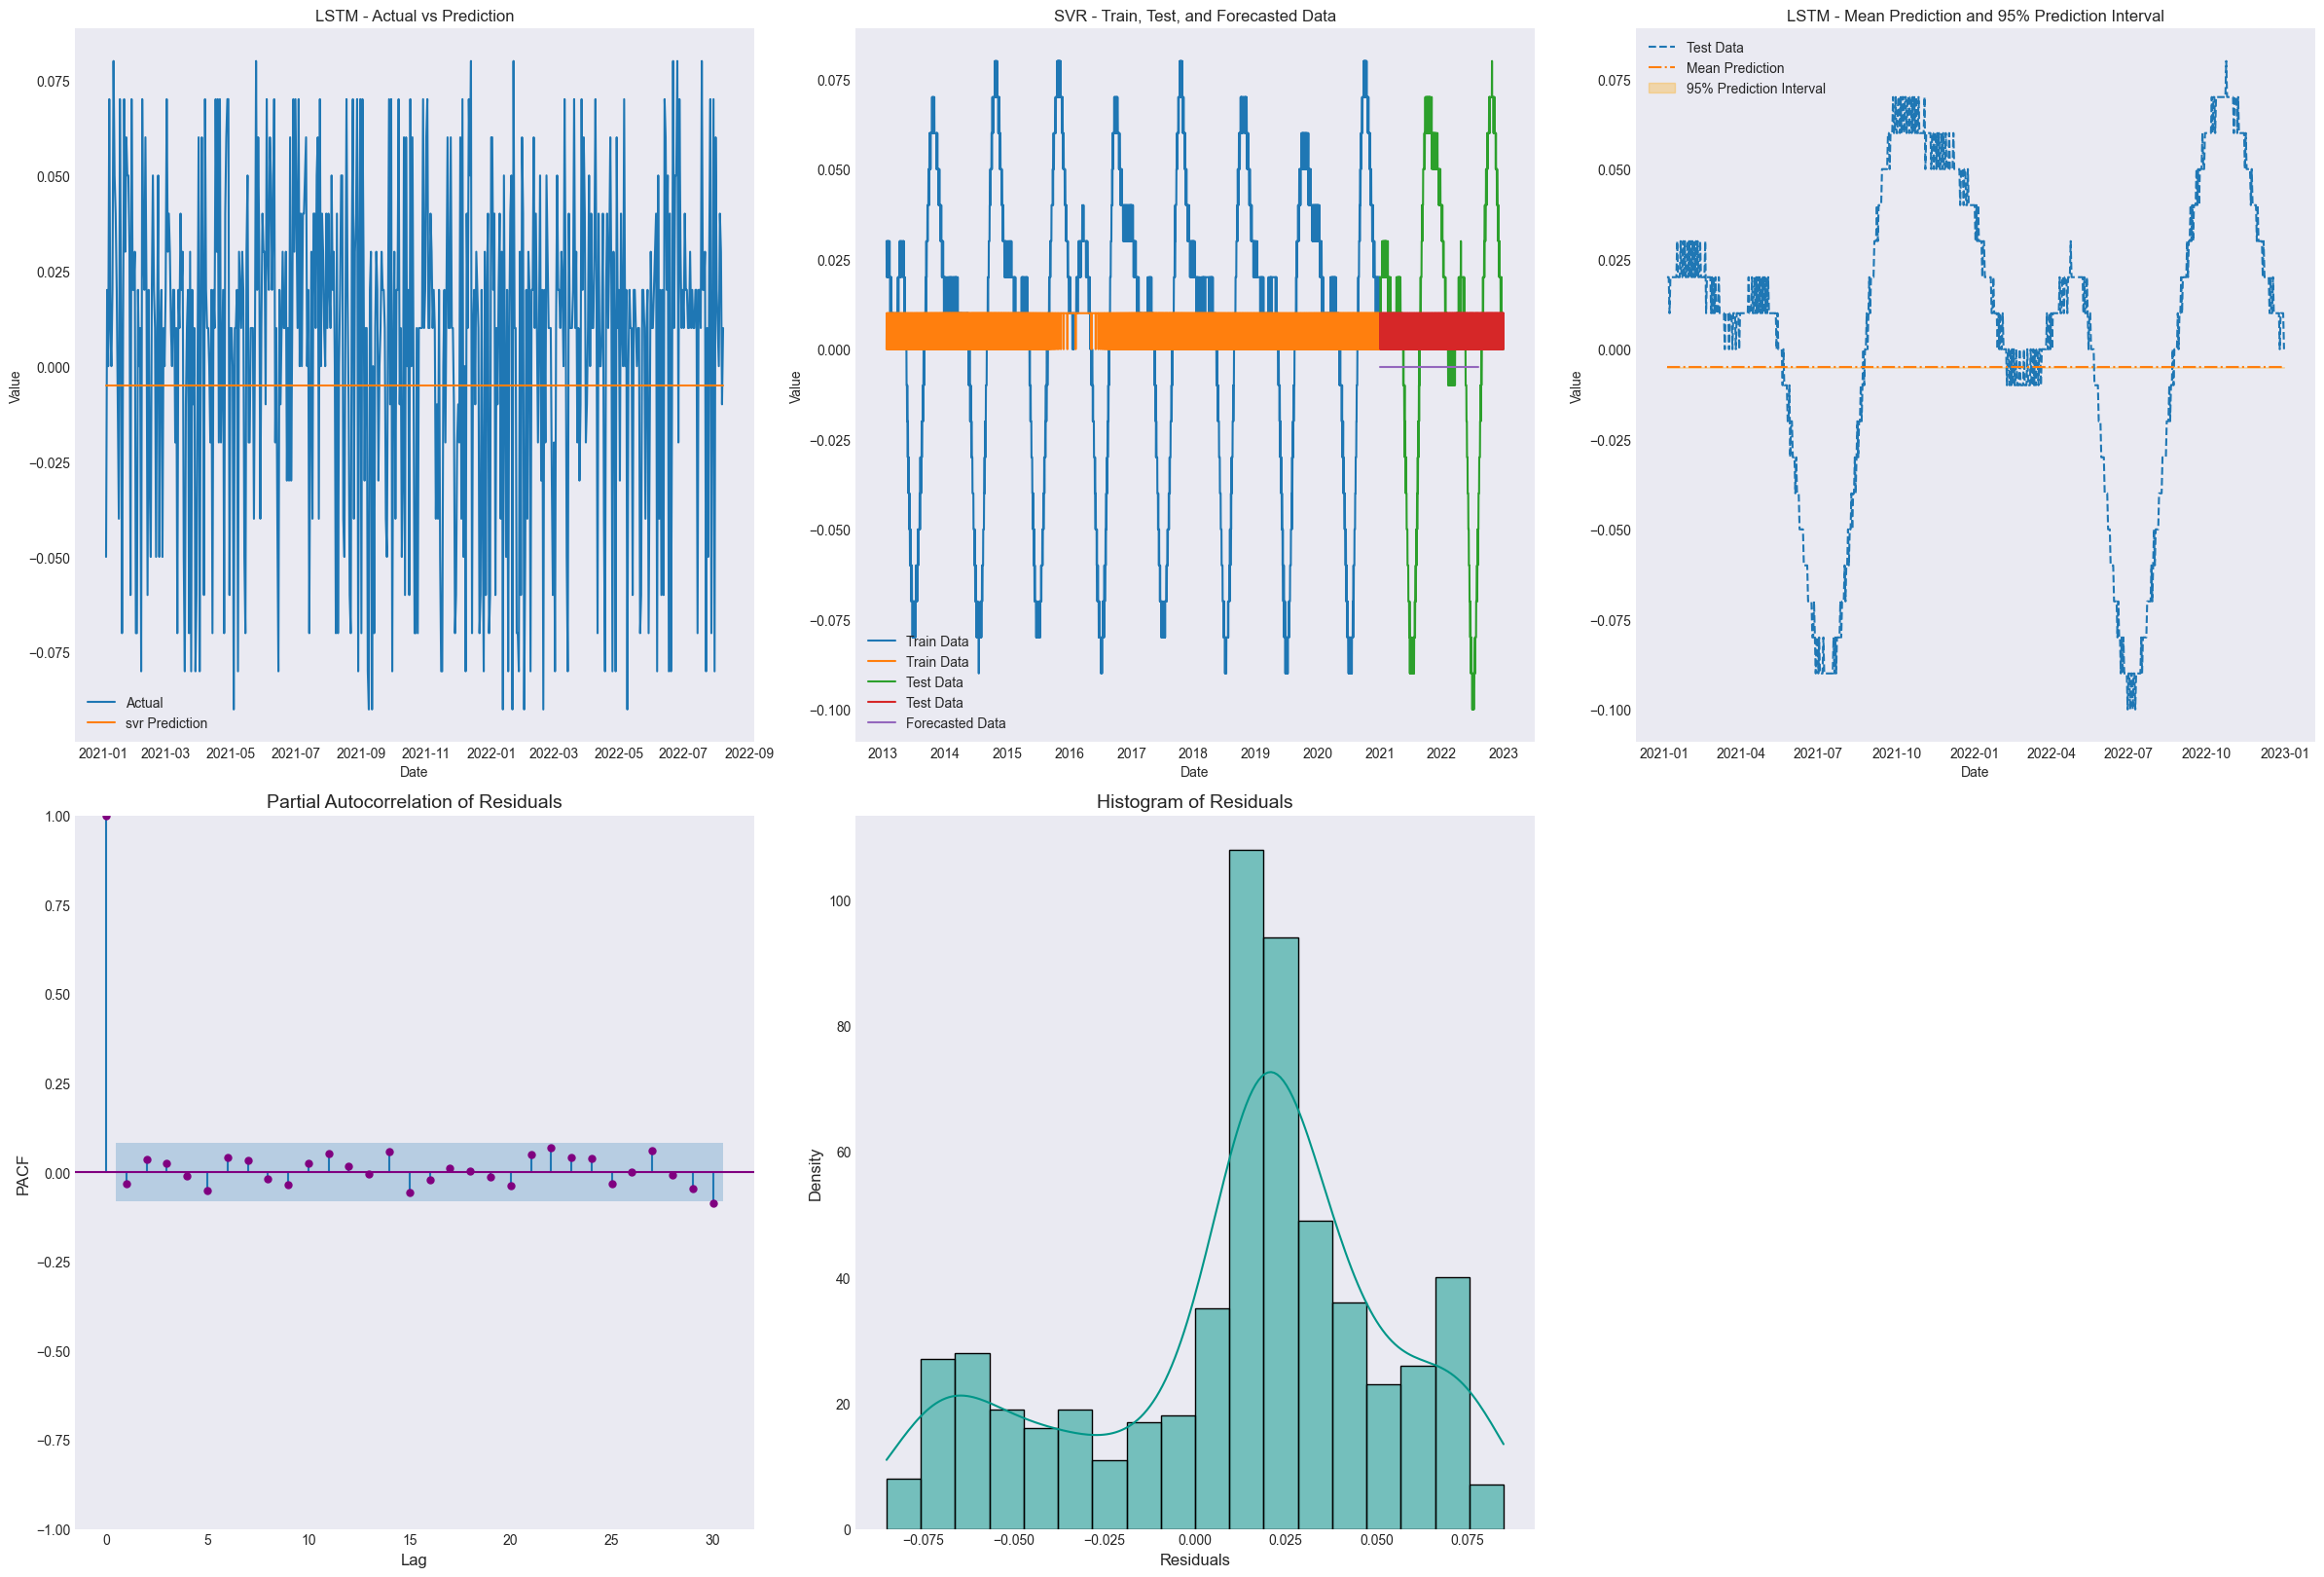

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
LSTM Accuracy:
MAE: 9.192420060628103e-05, RMSE: 0.00011320097526508696


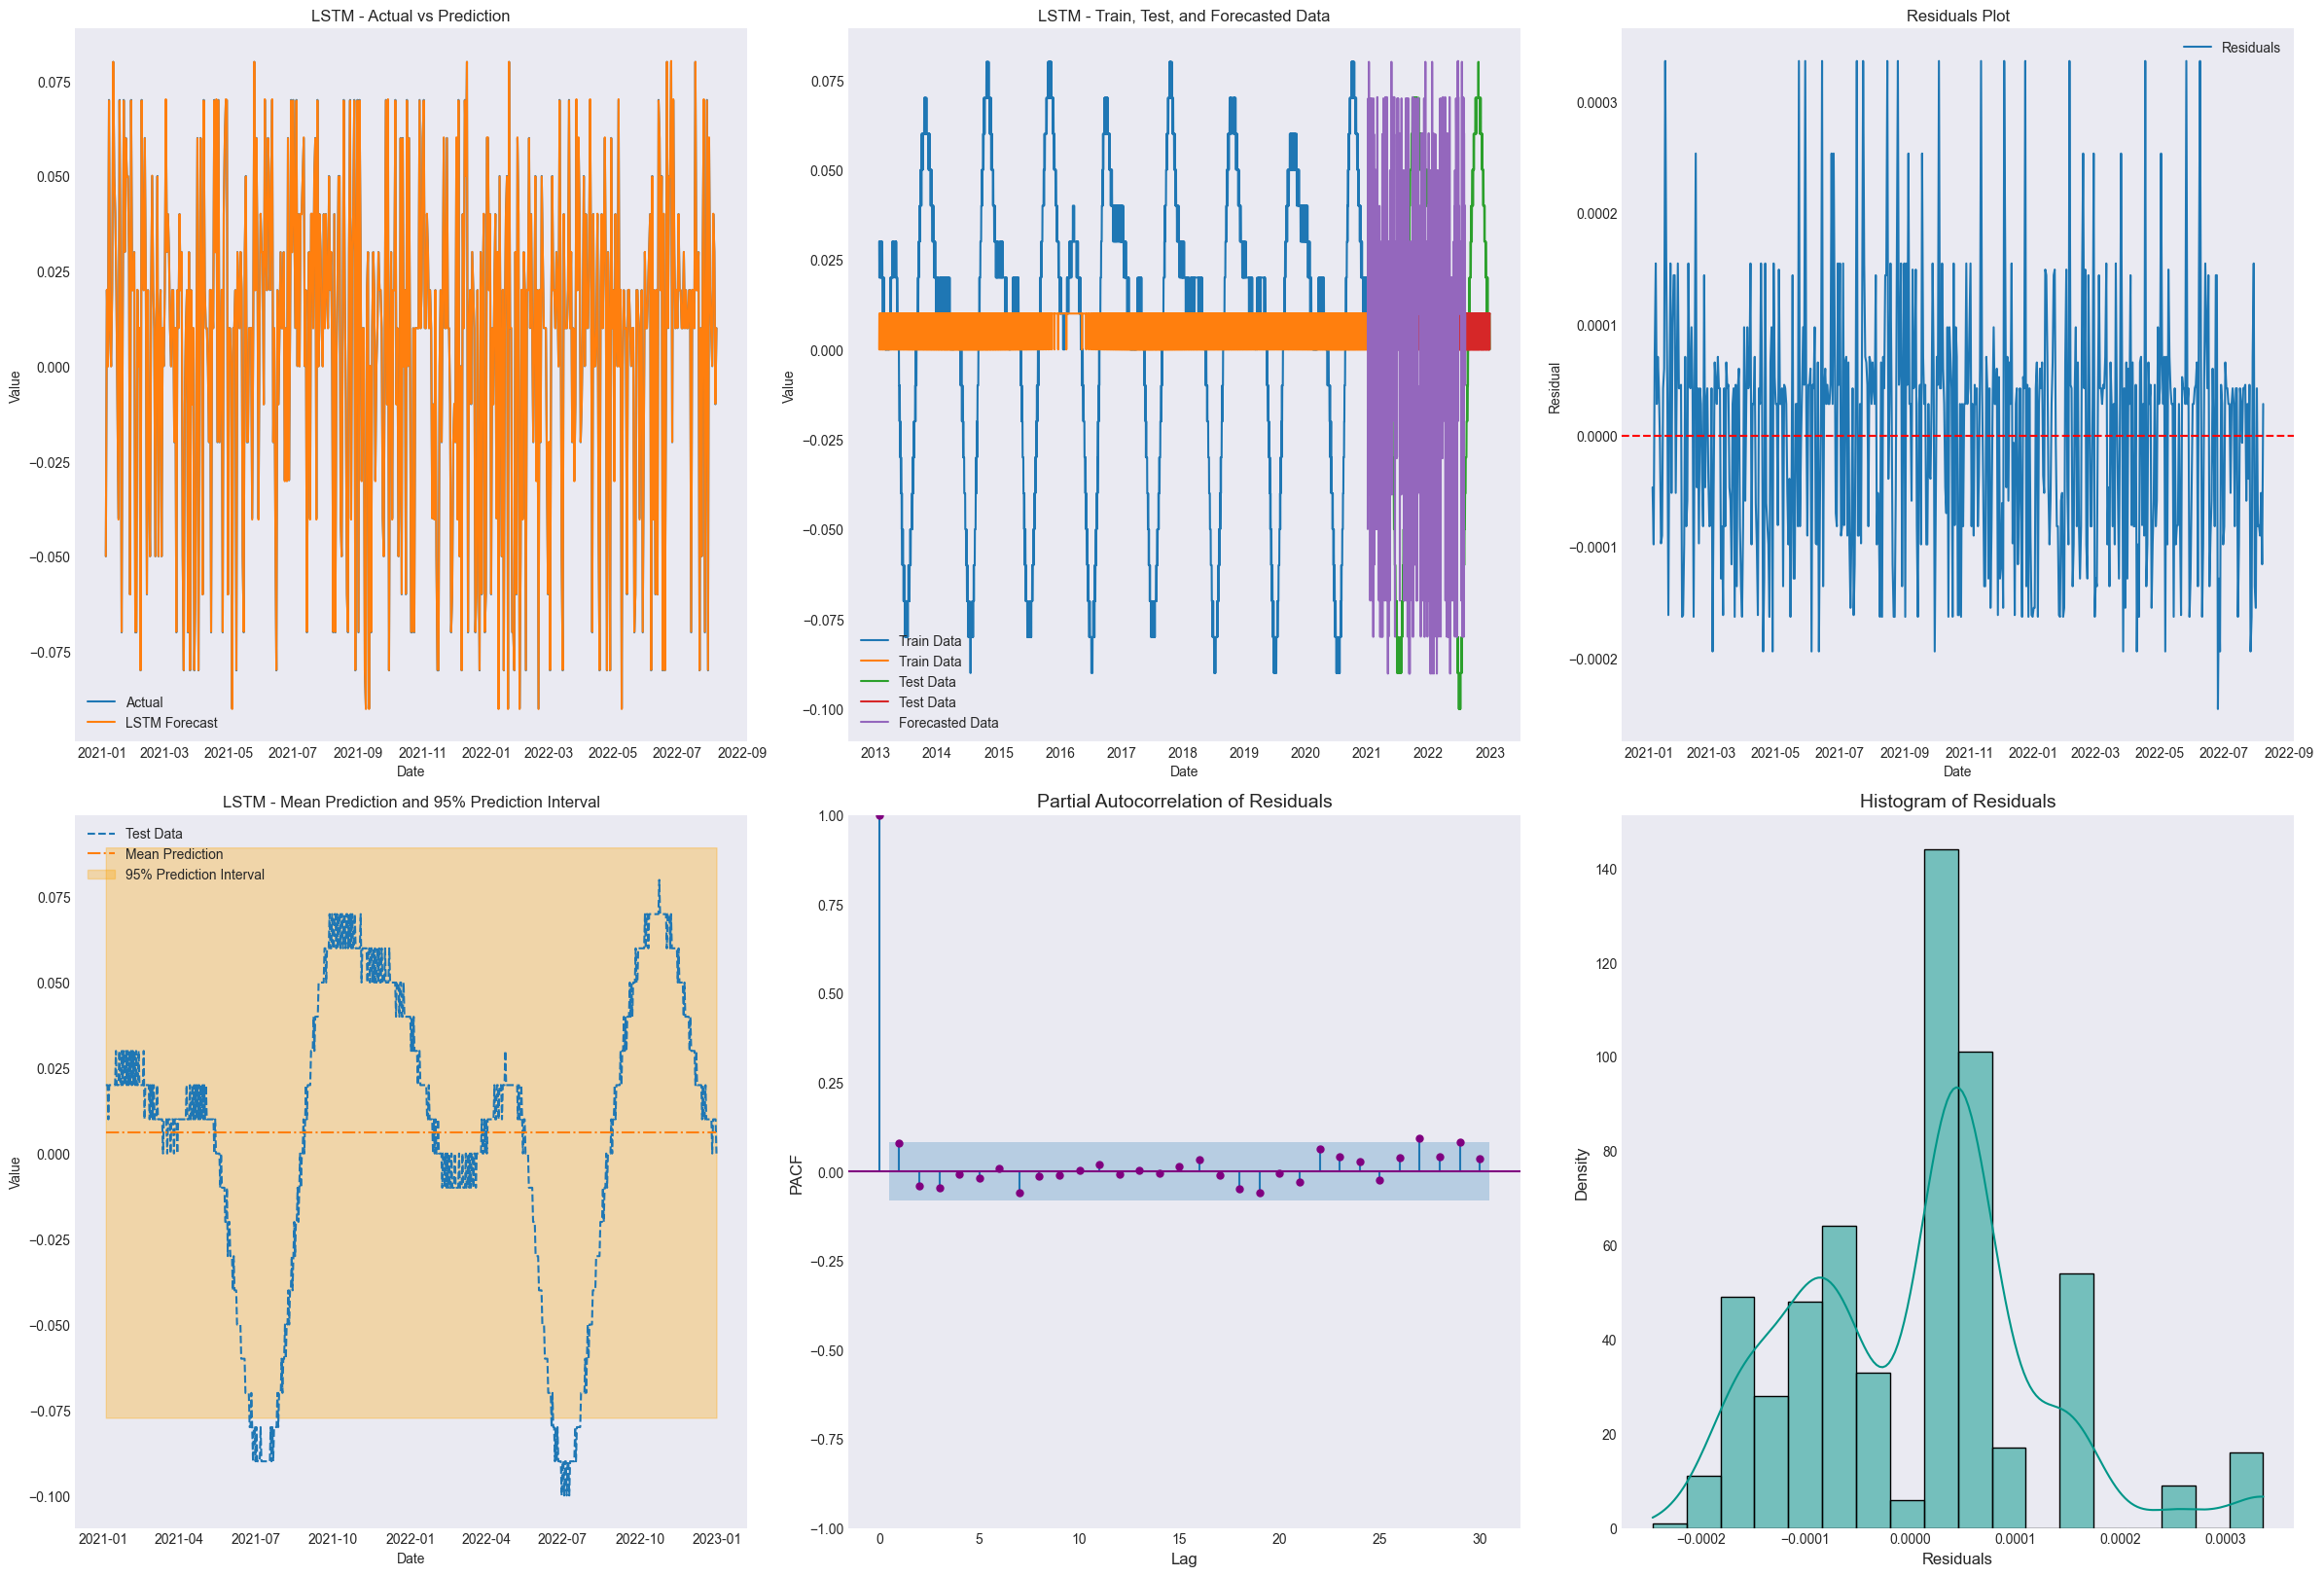

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Hybrid Model Accuracy:
MAE: 0.0352290646029529, MAPE: 6521146631615.179, RMSE: 0.04651136319370908


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


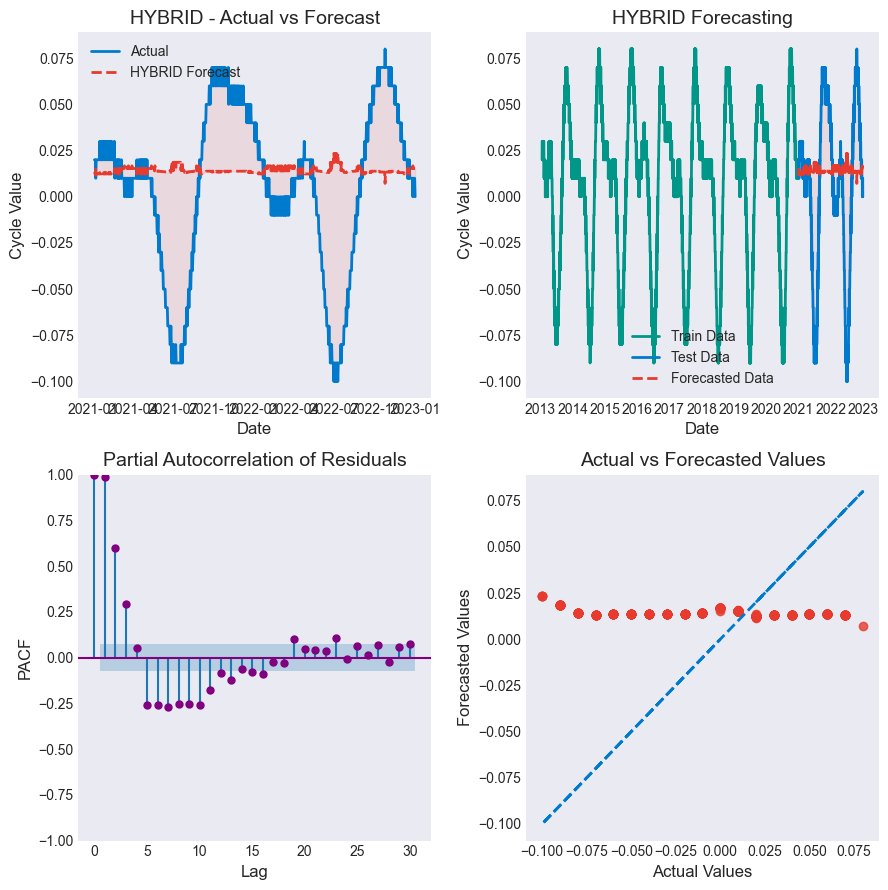

In [3]:
dfd = pd.read_csv("daily.csv")
dfd['date'] = pd.to_datetime(dfd['date'])
dfd.set_index('date', inplace=True)

# Perform differencing
dfd_diff = dfd.diff().dropna()

# Train-test split
train_size = int(len(dfd_diff) * 0.8)
df_train, df_test = dfd_diff.iloc[:train_size], dfd_diff.iloc[train_size:]

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(df_train[['cycle']])
test_data_scaled = scaler.transform(df_test[['cycle']])

#arima:
arima_forecast = arima_model(train_data_scaled, test_data_scaled)
arima_forecast = scaler.inverse_transform(arima_forecast.reshape(-1, 1)).flatten()
arima_mae, arima_mape, arima_rmse = calculate_accuracy(df_test['cycle'], arima_forecast)
print("ARIMA Accuracy:")
print(f"MAE: {arima_mae}, MAPE: {arima_mape}, RMSE: {arima_rmse}")

plotArima(arima_forecast , df_test , df_train)


#sarima
sarima_forecast = sarima_model(df_train['cycle'], df_test['cycle'])
sarima_mae, sarima_mape, sarima_rmse = calculate_accuracy(df_test['cycle'], sarima_forecast)
print("SARIMA Accuracy:")
print(f"MAE: {sarima_mae}, MAPE: {sarima_mape}, RMSE: {sarima_rmse}")

plotSarima(sarima_forecast , df_test , df_train)

#ets
ets_forecast = ets_model(df_train['cycle'], df_test['cycle'])
ets_mae, ets_mape, ets_rmse = calculate_accuracy(df_test['cycle'], ets_forecast)
print("ETS Accuracy:")
print(f"MAE: {ets_mae}, MAPE: {ets_mape}, RMSE: {ets_rmse}")

plotETS(ets_forecast , df_test , df_train) 

prophet_forecast = prophet_model(df_train['cycle'], df_test['cycle'])

# Calculate accuracy metrics
prophet_mae, prophet_mape, prophet_rmse = calculate_accuracy(df_test['cycle'], prophet_forecast)
print("Prophet Accuracy:")
print(f"MAE: {prophet_mae}, MAPE: {prophet_mape}, RMSE: {prophet_rmse}")

plotProphet(prophet_forecast , df_test , df_train)

#----------------------------------------------------------------ANN---------------------------------------------------------


# Features and target
X_train, X_test, y_train, y_test = train_test_split(df_train[['cycle', 'trend']], df_train['cycle'], test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the ANN model
ann_predictions = ann_model(X_train_scaled, y_train, X_test_scaled, y_test)
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_rmse = np.sqrt(ann_mse)
ann_mae = mean_absolute_error(y_test, ann_predictions)

print("ANN Accuracy:")
print(f"MAE: {ann_mae}, MSE: {ann_mse}, RMSE: {ann_rmse}")

 
plotAnn(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test , ann_predictions)

#-------------------------------------------------SVR-----------------------------------------------
svr_predictions = svr_model(X_train_scaled, y_train, X_test_scaled)
svr_predictions_index = df_test.index[:len(svr_predictions)]
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_predictions)
print("SVR Accuracy:")
print(f"MAE: {svr_mae}, MSE: {svr_mse}, RMSE: {svr_rmse}")

plotSvr(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test ,svr_predictions)

#-----------------------------------------------------------------LSTM---------------------------------------------------------
lstm_predictions = lstm_model(X_train_scaled, y_train, X_test_scaled)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

print("LSTM Accuracy:")
print(f"MAE: {lstm_mae}, RMSE: {lstm_rmse}")

plotLstm(df_test , df_train ,y_test , X_train_scaled ,X_test_scaled , y_train , X_test ,lstm_predictions)

#----------------------------------------------------------------------------------------------------------------------------------------
hybrid_forecast = hybrid_model(df_train['cycle'], df_test['cycle'])
hybrid_mae, hybrid_mape, hybrid_rmse = calculate_accuracy(df_test['cycle'], hybrid_forecast)
print("Hybrid Model Accuracy:")
print(f"MAE: {hybrid_mae}, MAPE: {hybrid_mape}, RMSE: {hybrid_rmse}")

plotHybrid(df_test , hybrid_forecast , df_train)


In [6]:
# Compare model performances
models = {'ARIMA': arima_rmse, 'SARIMA': sarima_rmse, 'ETS': ets_rmse, 'Prophet': prophet_rmse, 'SVR': svr_rmse, 'LSTM': lstm_rmse , 'ANN' : ann_rmse, 'hybrid' : hybrid_rmse}
best_model = min(models, key=models.get)
print(f"The best model is {best_model}.")

The best model is LSTM.


In [7]:
# Compare model performances
models = {'ARIMA': arima_rmse, 'SARIMA': sarima_rmse, 'ETS': ets_rmse, 'Prophet': prophet_rmse, 'SVR': svr_rmse, 'LSTM': lstm_rmse , 'ANN' : ann_rmse, 'hybrid' : hybrid_rmse}
best_model = min(models, key=models.get)
print(f"The best model is {best_model}.")
sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=False)

print("Models sorted by RMSE in descending order:")
for model, rmse in sorted_models:
    print(f"{model}: {rmse}")

best_model = min(models, key=models.get)
print(f"The best model is {best_model} with RMSE of {models[best_model]}.")


The best model is LSTM.
Models sorted by RMSE in descending order:
LSTM: 0.00011320097526508696
ANN: 0.000432413945361182
Prophet: 0.009948504684815463
SVR: 0.04398648282434387
ETS: 0.045591794488982984
ARIMA: 0.04560158101620995
hybrid: 0.04651136319370908
SARIMA: 0.05334104378862111
The best model is LSTM with RMSE of 0.00011320097526508696.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


15:46:56 - cmdstanpy - INFO - Chain [1] start processing
15:46:57 - cmdstanpy - INFO - Chain [1] done processing


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


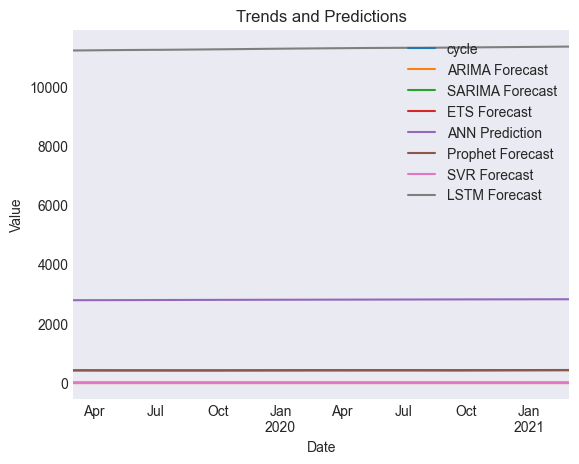

In [5]:



def plot_date_range(df, start_date, end_date):
    subset = df.loc[start_date:end_date]
    
    # Plot trends
    subset['cycle'].plot(label='cycle')
    
    # ARIMA predictions
    arima_forecast = arima_model(df_train['cycle'], subset['cycle'])
    plt.plot(subset.index, arima_forecast, label='ARIMA Forecast')
    
    # SARIMA predictions
    sarima_forecast = sarima_model(df_train['cycle'], subset['cycle'])
    plt.plot(subset.index, sarima_forecast, label='SARIMA Forecast')
    
    # ETS predictions
    ets_forecast = ets_model(df_train['cycle'], subset['cycle'])
    plt.plot(subset.index, ets_forecast, label='ETS Forecast')
    
    # ANN predictions
    X_subset = subset[['cycle', 'trend']]
    X_subset_scaled = scaler.transform(X_subset)
    ann_predictions = ann_model(X_train_scaled, y_train, X_subset_scaled, subset['cycle'])
    plt.plot(subset.index, ann_predictions, label='ANN Prediction')
    
    # Prophet predictions
    prophet_forecast = prophet_model(subset['cycle'], subset['cycle'])  # Use Prophet model
    plt.plot(subset.index, prophet_forecast, label='Prophet Forecast')
    
    # SVR predictions
    svr_predictions = svr_model(X_train_scaled, y_train, X_subset_scaled)
    plt.plot(subset.index, svr_predictions, label='SVR Forecast')
    
    #lstm
     # Reshape input for LSTM (samples, timesteps, features)
    n_samples = X_subset_scaled.shape[0]
    n_features = X_subset_scaled.shape[1]
    X_subset_lstm = X_subset_scaled.reshape((n_samples, 1, n_features))
    
    # Generate LSTM predictions
    lstm_predictions = lstm_model2(X_train_scaled, y_train, X_subset_lstm)
    
    # Plot LSTM forecast
    plt.plot(subset.index, lstm_predictions, label='LSTM Forecast')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Trends and Predictions')
    plt.legend()
    plt.show()

    
# Ask user for start date and end date
start_date = '2019-03-02' #input("Enter start date (YYYY-MM-DD): ")
end_date =  '2021-03-01'#input("Enter end date (YYYY-MM-DD): ")

# Plot trends and predictions for the specified date range
plot_date_range(dfd, start_date, end_date)

